<a href="https://colab.research.google.com/github/manhduc07/Toan/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [2]:
#lấy dữ liệu
iris = datasets.load_iris()
X = iris.data[:, :2]  # Chỉ lấy hai đặc trưng đầu tiên để dễ vẽ đồ thị
y = iris.target

In [3]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Khởi tạo mô hình SVM với kernel là linear
clf = svm.SVC(kernel='linear', C=1, decision_function_shape='ovr')

# Huấn luyện mô hình với tập huấn luyện
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [5]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình là: {accuracy}")

Độ chính xác của mô hình là: 0.8


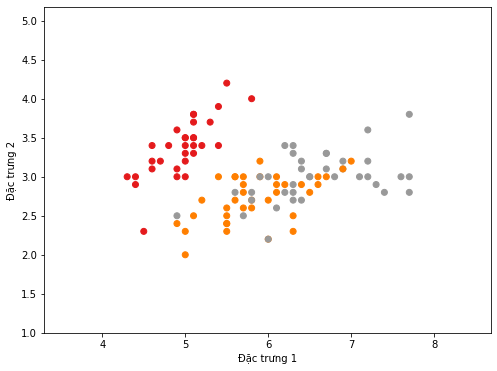

In [6]:
# Vẽ đồ thị biểu diễn kết quả phân loại của mô hình SVM trên tập huấn luyện
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1)
plt.xlabel('Đặc trưng 1')
plt.ylabel('Đặc trưng 2')

# Tìm giá trị tối ưu của tham số C và vẽ đường biên
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Vẽ đường biên và margin
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0)

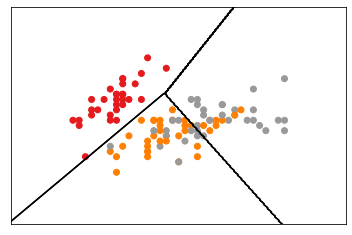

In [7]:
# Hiển thị đồ thị
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1)
plt.contour(xx, yy, Z, colors='black', linewidths=1)
plt.xticks(())
plt.yticks(())
plt.show()